In [5]:
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal


# read csv file
data = pd.read_csv('../model_based_agents/ver1/data/MountainCarContinuous-v0-1000.csv')

# column : state,action,reward,done,next_state
# state : [position,velocity] : stored as string "[ value , value ]"
# action : [-1,1] : stored as string "[value]"
# reward : [-1,0,1] : stored as string "value"
# done : {True,False} : stored as string like "True"

# convert string to numpy array
data['state'] = data['state'].apply(lambda x: np.fromstring(x[1:-1], sep=' ', count=2))
data['action'] = data['action'].apply(lambda x: np.fromstring(x[1:-1], sep=' ', count=1))
data['next_state'] = data['next_state'].apply(lambda x: np.fromstring(x[1:-1], sep=' ', count=2))


# 가우시안 분포를 사용하기 위한 매개변수 초기화
mu_init = np.zeros(2)
sigma_init = np.eye(2)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state       1000 non-null   object 
 1   action      1000 non-null   object 
 2   reward      1000 non-null   float64
 3   done        1000 non-null   bool   
 4   next_state  1000 non-null   object 
dtypes: bool(1), float64(1), object(3)
memory usage: 32.4+ KB


In [6]:
# convert dataframe to numpy array
data = data.values
print(data.shape)

(1000, 5)


In [7]:
def maximum_likelihood(data, mu_init, sigma_init):
    state_action_pairs = []
    for state, action, _, _, _ in data:
        state_action_pairs.append(np.concatenate([state, np.array([action])]))

    # 평균과 공분산 행렬 추정
    mu = np.mean(state_action_pairs, axis=0)
    sigma = np.cov(np.array(state_action_pairs).T)

    # 최대 우도 추정 값을 계산
    mle = multivariate_normal(mean=mu, cov=sigma)

    return mle


In [8]:
def maximum_likelihood(data, mu_init, sigma_init):
    state_action_pairs = []
    for state, action, _, _, _ in data:
        # action을 1차원 배열로 변환
        action = action.ravel()
        state_action_pairs.append(np.concatenate([state, action]))

    # 평균과 공분산 행렬 추정
    mu = np.mean(state_action_pairs, axis=0)
    sigma = np.cov(np.array(state_action_pairs).T)

    # 최대 우도 추정 값을 계산
    mle = multivariate_normal(mean=mu, cov=sigma)

    return mle


In [9]:
mle = maximum_likelihood(data, mu_init, sigma_init)
print(f"평균: {mle.mean}")
print(f"공분산 행렬: {mle.cov}")

평균: [-5.26346896e-01 -2.25012270e-04 -3.99833059e-03]
공분산 행렬: [[ 2.77109738e-02  1.15817926e-04 -1.67709324e-03]
 [ 1.15817926e-04  1.87503465e-04 -1.10977408e-04]
 [-1.67709324e-03 -1.10977408e-04  3.39312801e-01]]


/env/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/env/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


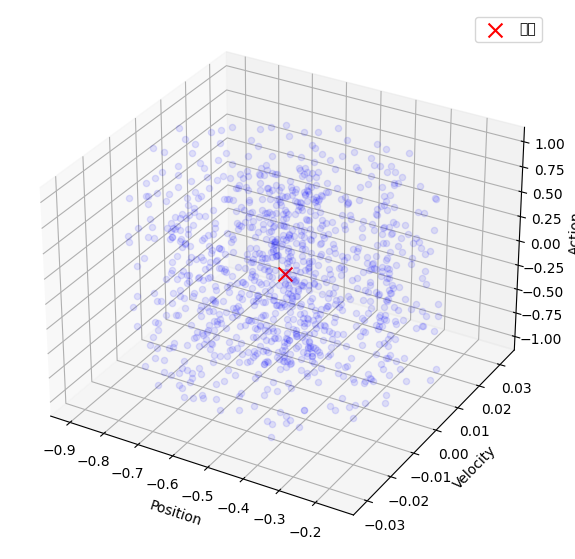

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_data_and_distribution(data, mle):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # 데이터 점 표시
    for state, action, _, _, _ in data:
        ax.scatter(state[0], state[1], action, c='blue', marker='o', alpha=0.1)

    # 평균값 표시
    mean_position, mean_velocity, mean_action = mle.mean
    ax.scatter(mean_position, mean_velocity, mean_action, c='red', marker='x', s=100, label='평균')

    # 축 레이블 설정
    ax.set_xlabel('Position')
    ax.set_ylabel('Velocity')
    ax.set_zlabel('Action')

    # 범례 표시
    ax.legend()

    plt.show()

plot_data_and_distribution(data, mle)
